In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [2]:
dataset=pd.read_csv("dataset.csv")
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RowID,Joblevel,DistancetoHome,istrain,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,...,ExtraTime,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
0,1,1,3,1,Less,Female,3,9964,0,4,...,No,7/27/2002,10,1,5/29/2013,3,2670,Medical,4,Married
1,2,2,15,1,Less,Female,4,12682,0,2,...,No,5/25/2004,15,3,4/21/2005,0,4193,Life Sciences,3,Single
2,3,1,24,1,Less,Male,3,12947,0,2,...,No,4/22/2008,19,3,4/28/2010,0,2028,Life Sciences,3,Single
3,4,1,5,1,Less,Male,1,15053,0,4,...,Yes,6/22/2007,21,2,7/30/2008,2,3298,Life Sciences,3,Divorced
4,5,1,2,1,Less,Male,4,4306,1,3,...,No,7/26/2008,24,4,6/21/2011,0,3944,Life Sciences,3,Single


In [9]:
train = dataset[dataset['istrain'] == 1]
print(dataset.shape)
print(train.shape)
target = train['ExtraTime']
train = train.drop(['istrain','ExtraTime'], axis=1)
train['ExtraTime'] = target
print(train.shape)
train.head()
train["ExtraTime"] = train["ExtraTime"].replace('No', 0)
train["ExtraTime"]  = train["ExtraTime"].replace('Yes', 1)

(50341, 36)
(40303, 36)
(40303, 35)


In [16]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict, ShuffleSplit,cross_val_score



import numpy as np
predictors = ['Joblevel', 'OfficeAmbienceRating','SelfMotivationRating','RelationshipSatisfaction','Education','WorkLifeBalance','Happynesslevelinjob', 'ESOps','PerformanceRating']

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, 
                            min_samples_leaf=1)
kf = KFold(train.shape[0], n_folds=5, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

predictions = cross_validation.cross_val_predict(rf, train[predictors],train["ExtraTime"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, train[predictors], train["ExtraTime"],
                                          scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.6699553375279792


In [17]:
predictors = ['Joblevel', 'OfficeAmbienceRating','SelfMotivationRating','RelationshipSatisfaction','Education','WorkLifeBalance','Happynesslevelinjob', 'ESOps','PerformanceRating']
rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=9,min_samples_split=6, min_samples_leaf=4)
rf.fit(train[predictors],train["ExtraTime"])
kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(rf, train[predictors],train["ExtraTime"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, train[predictors], train["ExtraTime"],scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.6002826083836206


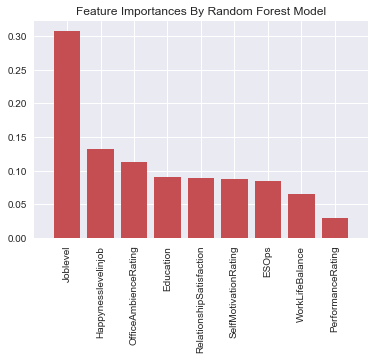

In [18]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);